# Breast Cancer Dataset Exploratory Data Analysis

#### Description 
We conduct Exploratory Data Analysis on Bread Cancer Diagnostic Data obtained from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).    
This dataset contains features that describe characterstics of the cell from digitized images. 

**Attribute Information**:

- Target Variable: Diagnosis (M = malignant, B = benign)
- Ten real-valued features are computed for each cell nucleus:
    1. radius (mean of distances from center to points on the perimeter) 
    2. texture (standard deviation of gray-scale values) 
    3. perimeter 
    4. area 
    5. smoothness (local variation in radius lengths) 
    6. compactness (perimeter^2 / area - 1.0) 
    7. concavity (severity of concave portions of the contour) 
    8. concave points (number of concave portions of the contour)
    9. symmetry
    10. fractal dimension ("coastline approximation" - 1)

For each of the 10 features, the mean, standard error and the worst (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.



# 

### Part 1: Loading Libraries and Data

In [1]:
import numpy as np               # linear algebra
import pandas as pd              # data processing
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns            # data visualization

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import svm

/Users/jil380/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jil380/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dat = pd.read_csv('~/Desktop/projects/Breast_Cancer_EDA/Breast_cancer_diagnositcs.csv')

#   
### Part 2: Visual Inspection 

In [3]:
# First, look at a sample of data
print('There are', dat.shape[0], 'rows.') 
dat.head()

There are 569 rows.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# See column names as a list
dat.columns       

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Check missingness
print('Any missingness in columns? --- ', dat.isnull().values.any()) 

Any missingness in columns? ---  True


In [6]:
# Since there are values missing, let's look at by each column
dat.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Check if there is any duplicated rows
dat.duplicated().value_counts()

False    569
dtype: int64

In [8]:
# Separate dependent variable (diagnosis labels) from features
y = dat.diagnosis   

drop_vars = ['id','diagnosis','Unnamed: 32']
x = dat.drop(drop_vars, axis = 1 )
x.head(n=3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#   
### Part 3: Plot Diagnosis Distributions

Number of Benign:  357
Number of Malignant :  212
Proportion of Malignant diagnosis is 37.26 %.


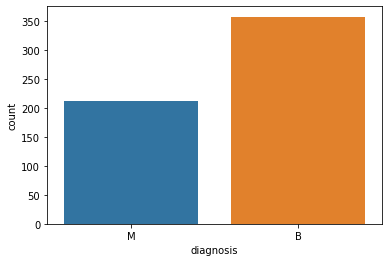

In [9]:
# Let's look at the distribution of diagnosis (our target variable)
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
print('Proportion of Malignant diagnosis is', round(M/(M+B), 4) *100, '%.')

In [10]:
# Let's look at descriptive stats of our features
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#    
### Part 4: Visualize distributions of feature variables

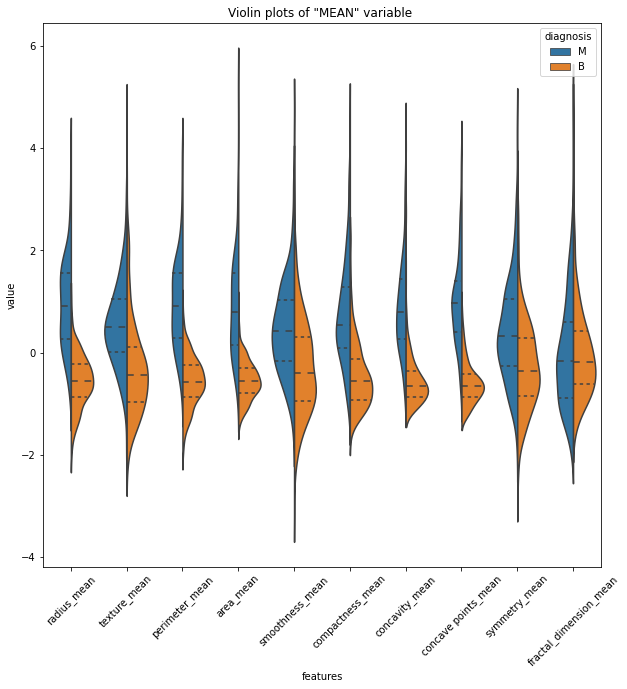

In [11]:
# Let's look at it by group of ten features

# Standardize all features so that we can plot them together on one plot
x_std = (x - x.mean()) / (x.std())

dat = pd.concat([y, x_std.iloc[:,:10]], axis =1)

# Unpivot dataframe 
dat = pd.melt(dat, id_vars = 'diagnosis',  
                   var_name = 'features',
                   value_name = 'value')

plt.figure(figsize=(10,10))

# create violinplot to see 1) distributions of each variable and 2) if/how they differ by diagnosis
sns.violinplot(x='features', y='value', hue='diagnosis', data=dat, split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Violin plots of "MEAN" variable ');

It looks like some features have different distributions by dignosis. They will be useful classification later.

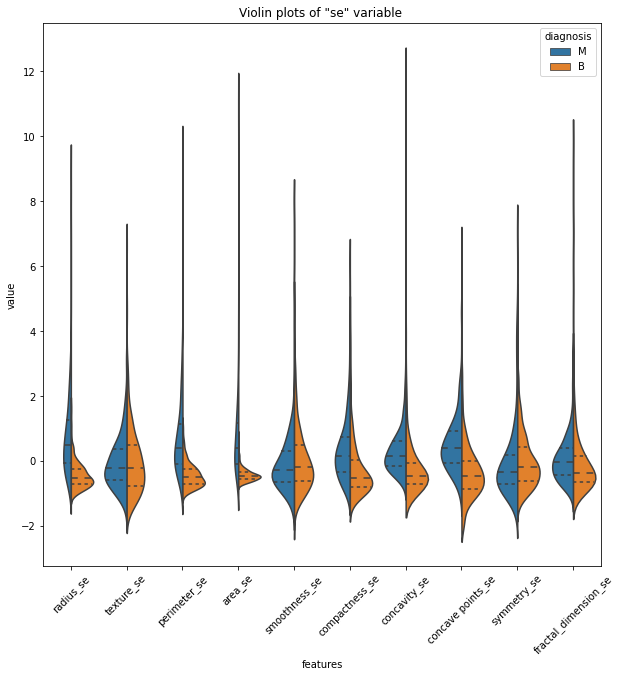

In [12]:
# Second ten features
dat = pd.concat([y, x_std.iloc[:,10:20]], axis =1)

# Unpivot dataframe to make from wide to long format
dat = pd.melt(dat, id_vars = 'diagnosis',  
                   var_name = 'features',
                   value_name = 'value')

plt.figure(figsize=(10,10))

# create violinplot to see 1) distributions of each variable and 2) if/how they differ by diagnosis
sns.violinplot(x='features', y='value', hue='diagnosis', data=dat, split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Violin plots of "se" variable ');

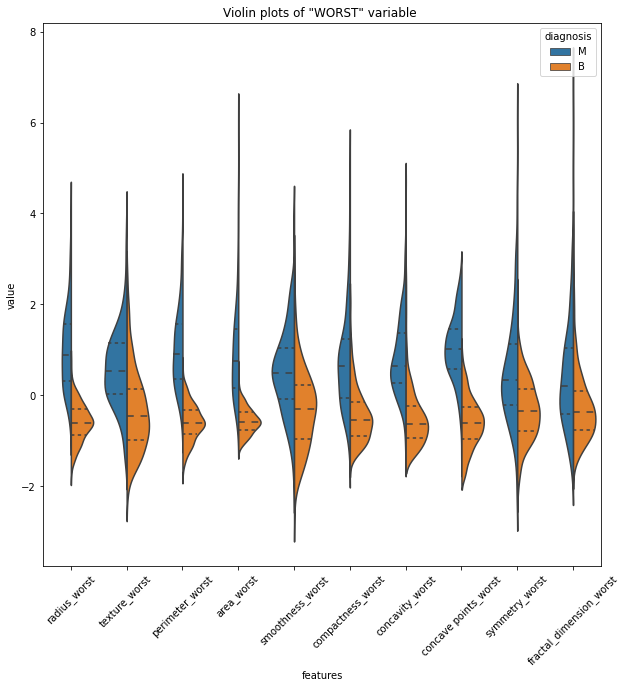

In [13]:
# Third ten features

dat = pd.concat([y, x_std.iloc[:,20:]], axis =1)

# Unpivot dataframe to make from wide to long format
dat = pd.melt(dat, id_vars = 'diagnosis',  
                   var_name = 'features',
                   value_name = 'value')

plt.figure(figsize=(10,10))

# create violinplot to see 1) distributions of each variable and 2) if/how they differ by diagnosis
sns.violinplot(x='features', y='value', hue='diagnosis', data=dat, split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Violin plots of "WORST" variable ');

#    
### Part 5: Check Outliers Using Box Plots

Boxplots are helpful to see if there are any outliers in the data.

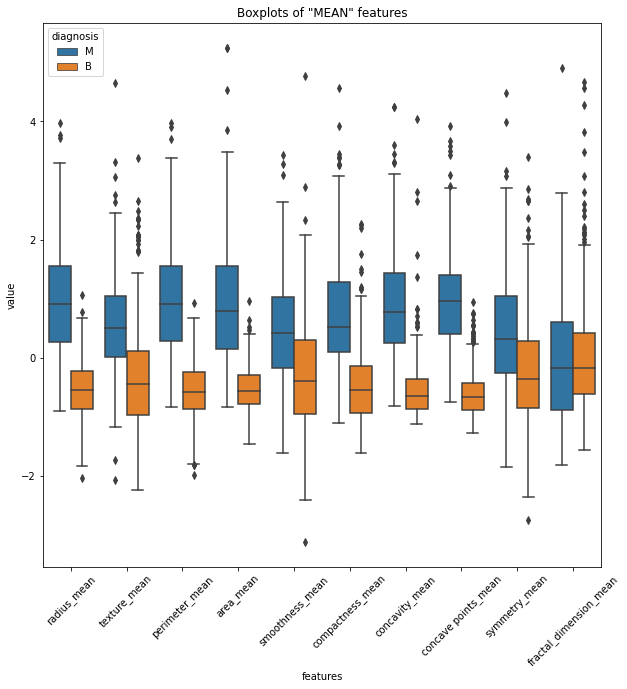

In [14]:
dat = pd.concat([y, x_std.iloc[:,:10]], axis =1)

# Unpivot dataframe to make from wide to long format
dat = pd.melt(dat, id_vars = 'diagnosis',  
                   var_name = 'features',
                   value_name = 'value')

plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=dat)
plt.title('Boxplots of "MEAN" features')
plt.xticks(rotation=45);


No sign of extreme outliers we might consider removing.

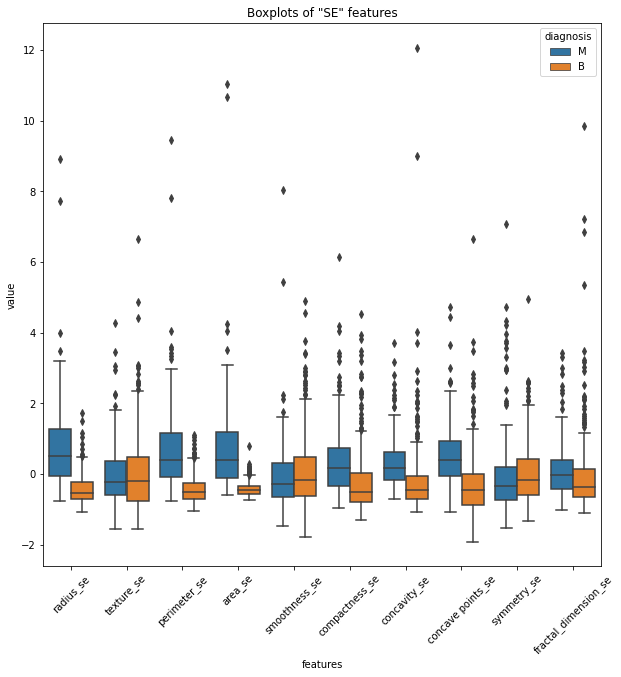

In [15]:
dat = pd.concat([y, x_std.iloc[:,10:20]], axis =1)

# Unpivot dataframe to make from wide to long format
dat = pd.melt(dat, id_vars = 'diagnosis',  
                   var_name = 'features',
                   value_name = 'value')

plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=dat)
plt.title('Boxplots of "SE" features')
plt.xticks(rotation=45);

Standard error variables seem to have some outliers.

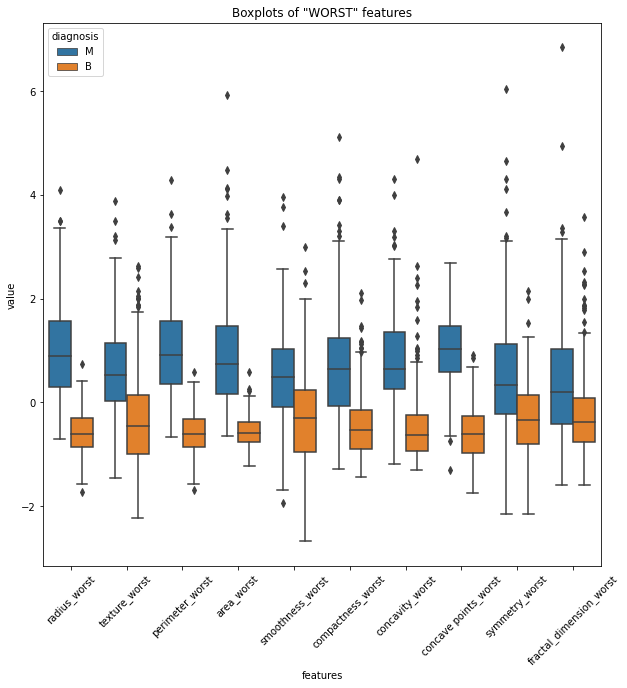

In [16]:
dat = pd.concat([y, x_std.iloc[:,20:]], axis =1)

# Unpivot dataframe to make from wide to long format
dat = pd.melt(dat, id_vars = 'diagnosis',  
                   var_name = 'features',
                   value_name = 'value')

plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=dat)
plt.title('Boxplots of "WORST" features')
plt.xticks(rotation=45);

#    
### Part 6: Compare Features Using Joint Plots

It is reasonable to think that the 'mean' variables are correlated with the 'worst' variables. 
We are going to use jointplot for some features to see if that could be the case.

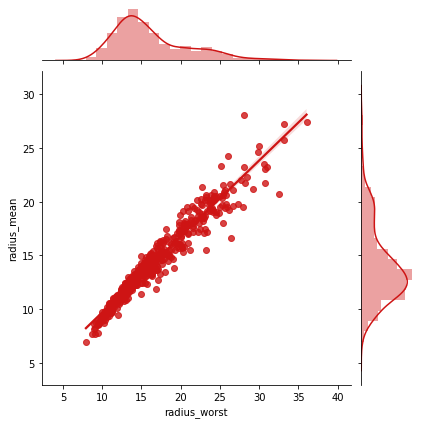

In [17]:
sns.jointplot(x.loc[:,'radius_worst'],
              x.loc[:,'radius_mean'],
              kind="regg",
              color="#ce1414");

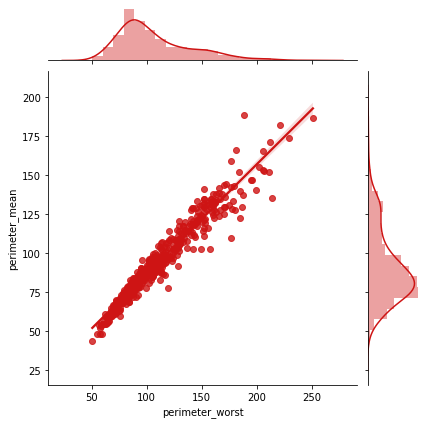

In [18]:
sns.jointplot(x.loc[:,'perimeter_worst'],
              x.loc[:,'perimeter_mean'],
              kind="regg",
              color="#ce1414");

We've only looked at two pairs of features, radius and perimeter, and it seems like they are highly correlated. 
We eventually want to select some features so that we reduce the risk of multicollinearity in our model.

# 

### Part 7: Check Pair-wise Correlations

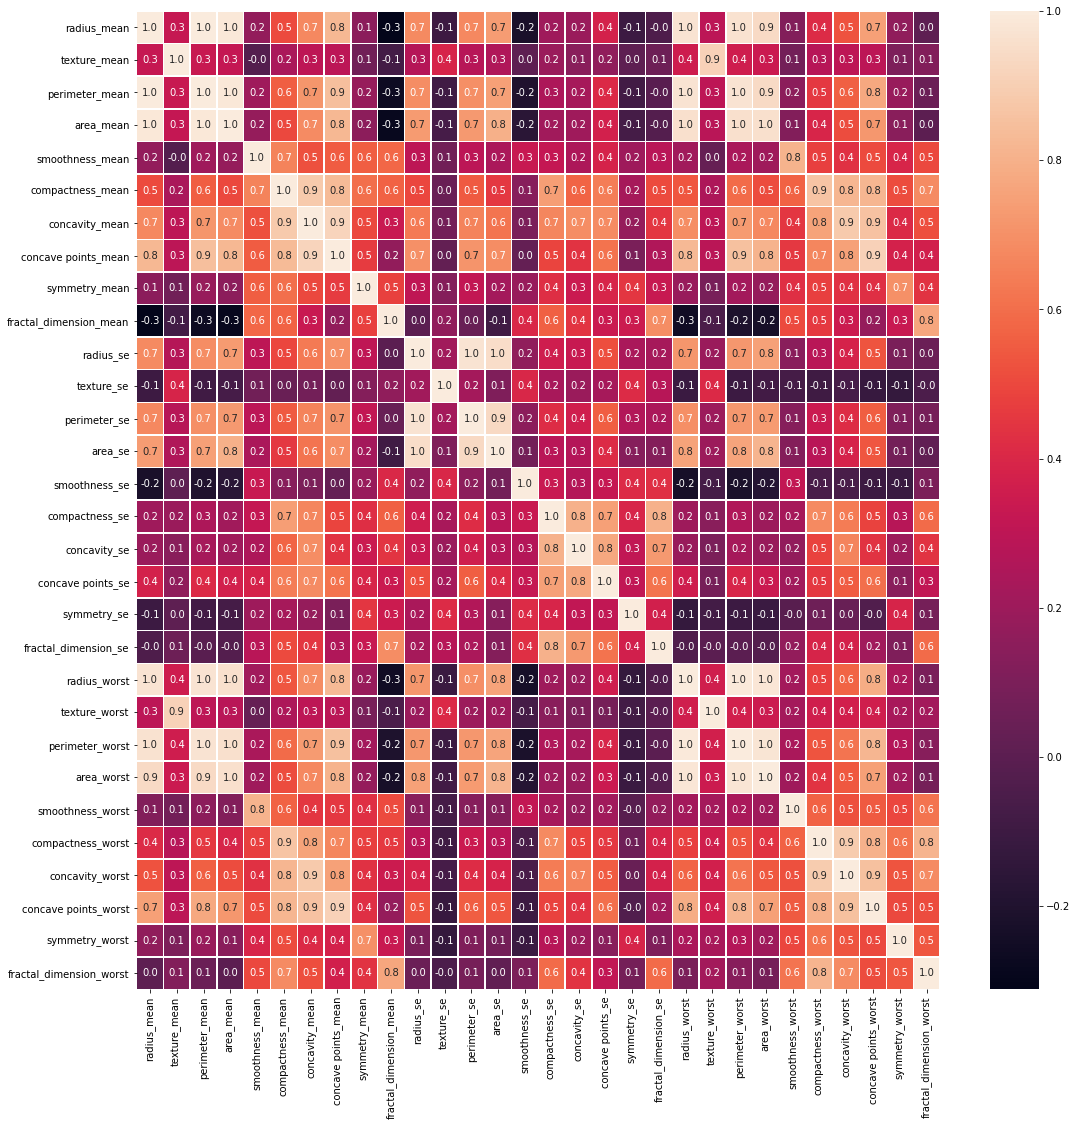

In [19]:
# Plot correlation heat map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Some features are very highly corrleated (and some are almost perfectly correlated) as expected.

# 

### Part 8: Feature Selection Using Principal Component Analysis

In [20]:
# Split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=91)

# Standardize all features - scale matters for PCA
std_scaler = StandardScaler()
std_scaler.fit(x_train)

x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

# this is for visualizing principle components later
train_df = pd.DataFrame(x_train)
train_df['diagnosis'] = y_train

In [21]:
# Create an instance of PCA
pca = PCA()    

# Fit PCA using train set
pca.fit(x_train_std)
x_train_std = pca.transform(x_train_std)
x_test_std = pca.transform(x_test_std)

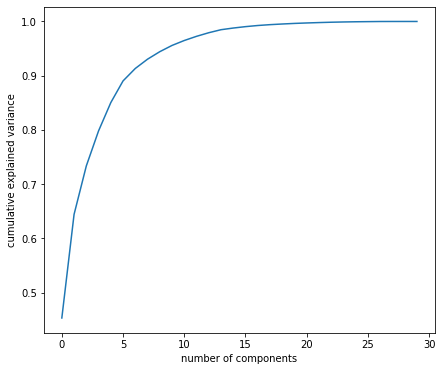

In [22]:
# Create a plot to see explained variance by number of components
plt.figure(1, figsize=(7,6))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The plot tells us that 10 principle components can explain about 95% of the variance in our dataset. 

#     
### Part 8: Build Classification Models

#### 8.1. Logistic Regression Classifier

In [23]:
# Create an instance logistic regression
logreg = LogisticRegression()

# Fit training data
logreg.fit(x_train_std, y_train)

# Predict y values
logreg_y_pred = logreg.predict(x_test_std)
logreg_y_pred_train = logreg.predict(x_train_std)

# Get accuracy score
print("Training accuracy: ", accuracy_score(y_train,logreg_y_pred_train))
print("Test accuracy:", accuracy_score(y_test,logreg_y_pred))

Training accuracy:  0.9899497487437185
Test accuracy: 0.9883040935672515


B    105
M     66
Name: diagnosis, dtype: int64


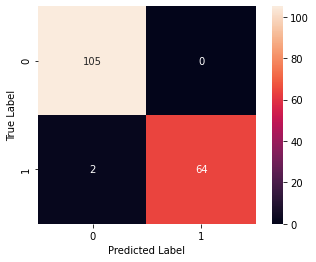

In [24]:
# Let's create confusion matrix 
cm = confusion_matrix(y_test, logreg_y_pred)
sns.heatmap(cm, square=True, annot=True, fmt="d")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(y_test.value_counts())

Logistic regression classifier performs really well. Training and test accuracy scores are very similar!

#     
#### 8.2. Random Forest Classifier

In [25]:
# Random forest
rf = RandomForestClassifier(random_state = 42)   
rf.fit(x_train_std, y_train)

rf_y_pred_train = rf.predict(x_train_std)
rf_y_pred = rf.predict(x_test_std)

print("Training accuracy: ", accuracy_score(y_train,rf_y_pred_train))
print("Test accuracy:", accuracy_score(y_test,rf_y_pred))

Training accuracy:  0.9849246231155779
Test accuracy: 0.9298245614035088


A default random forest classifier doesn't perfom as well as the logistic regression.

#     
#### 8.3. Support Vector Machine

In [26]:
svm = svm.SVC()
svm.fit(x_train_std, y_train)

svm_y_pred_train = svm.predict(x_train_std)
svm_y_pred = svm.predict(x_test_std)

print("Training accuracy: ", accuracy_score(y_train,svm_y_pred_train))
print("Test accuracy:", accuracy_score(y_test,svm_y_pred))

Training accuracy:  0.9849246231155779
Test accuracy: 0.9824561403508771


SVM model also shows high performance, though not as high as logistic regression.

#    
#### 8.4. K-Nearest Neighbors

In [27]:
knn = KNN()

knn.fit(x_train_std, y_train)

knn_y_pred_train = knn.predict(x_train_std)
knn_y_pred = knn.predict(x_test_std)

print("Training accuracy: ", accuracy_score(y_train,knn_y_pred_train))
print("Test accuracy:", accuracy_score(y_test,knn_y_pred))

Training accuracy:  0.9748743718592965
Test accuracy: 0.9766081871345029


#    
#### 8.5. Build an ensemble model

In [28]:
# We will use three top performing models
cl_pred = pd.DataFrame([logreg_y_pred, svm_y_pred, knn_y_pred]).T

In [29]:
cl_pred.shape

(171, 3)

In [30]:
# Replace values
cl_pred.replace('M',1, inplace=True)
cl_pred.replace('B',0, inplace=True)
cl_pred.head(3)

,0,1,2
0,1,1,1
1,0,0,0
2,0,0,0


In [31]:
# Get the mean value per row
cl_pred['final_y_pred'] = cl_pred.mean(axis=1)

In [32]:
# See observations where the predictions don't match
cl_pred_nomatch = cl_pred[cl_pred.final_y_pred > 0]
cl_pred_nomatch = cl_pred_nomatch[cl_pred_nomatch.final_y_pred < 1]
cl_pred_nomatch

,0,1,2,final_y_pred
88,0,0,1,0.333333
104,1,1,0,0.666667
162,0,1,0,0.333333


In [33]:
# When predictions differ by models, follow the majority
cl_pred.loc[cl_pred.final_y_pred > 0.5, 'final_y_pred'] = 1
cl_pred.loc[cl_pred.final_y_pred <= 0.5, 'final_y_pred'] = 0

In [34]:
# Get the final prediction from the ensemble model
final_y_pred = cl_pred['final_y_pred']

In [35]:
# Replace with the original diagnosis
y_test.replace("B", 0, inplace=True)
y_test.replace("M", 1, inplace=True)

In [36]:
# Get accuracy score
accuracy_score(y_test, final_y_pred)

0.9883040935672515

0    105
1     66
Name: diagnosis, dtype: int64


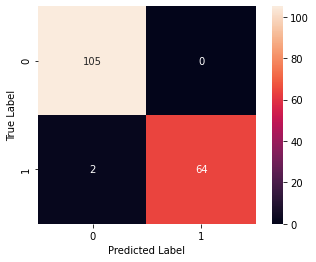

In [37]:
# Create confusion matrix one last time
# Let's create confusion matrix 
cm = confusion_matrix(y_test, final_y_pred)
sns.heatmap(cm, square=True, annot=True, fmt="d")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
print(y_test.value_counts())

#      
### Conclusion

Our ensemble model didn't improve the performance since the logistic regression classifier already performed very well with 98.8% accuracy, which was so close to the training accuracy as well. 
If we still want to improve the performance, we might want to try more models and build a bigger ensemble model as well as tuning hyperparameters for optimization.
